# 1. Data Reading using pandas

In [1]:
import pandas as pd

df = pd.read_csv('../data/raw.csv')

df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53040,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53041,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53042,53040,Is there any way to sleep better? I can't slee...,Anxiety
53043,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


# 2. Move each Correspondent status to each own list

depression list will only contains depression sentences and so are the rest.

In [2]:
depression = list()
personality_disorder = list()
bipolar = list()
anxiety = list()
stress = list()
normal = list()
suicide = list()

for i in range(len(df.status)):
    if df.status[i] == "Depression":
        depression.append(df.statement[i])
    elif df.status[i] == "Personality disorder":
        personality_disorder.append(df.statement[i])
    elif df.status[i] == "Bipolar":
        bipolar.append(df.statement[i])
    elif df.status[i] == "Anxiety":
        anxiety.append(df.statement[i])
    elif df.status[i] == "Stress":
        stress.append(df.statement[i])
    elif df.status[i] == "Normal":
        normal.append(df.statement[i])
    elif df.status[i] == "Suicidal":
        suicide.append(df.statement[i])
    else:
        continue

# 3. Labeled each sentences
"I'm so depressed" into ("I'm so depressed", "Depression")

In [3]:
labeled_sentences = list()

for sentence in depression:
    labeled_sentences.append((sentence, "Depression"))

for sentence in personality_disorder:
    labeled_sentences.append((sentence, "Personality Disorder"))

for sentence in bipolar:
    labeled_sentences.append((sentence, "Bipolar"))

for sentence in anxiety:
    labeled_sentences.append((sentence, "Anxiety"))

for sentence in stress:
    labeled_sentences.append((sentence, "Stress"))

for sentence in normal:
    labeled_sentences.append((sentence, "Normal"))

for sentence in suicide:
    labeled_sentences.append((sentence, "Suicidal"))

# 4. Seperates sentences and it's label into two different list

In [4]:
sentences = [str(sentence) for sentence, label in labeled_sentences]
labels = [str(label) for sentence, label in labeled_sentences]

# 5. Use TF-IDF to convert each sentences into a Vector Representative of words based on it's context.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', lowercase=True)
tfidf_vector = vectorizer.fit_transform(sentences).toarray()

tfidf_vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 6. Encode the label into a matrix "Depression" into 2, "Suicidal" into 6 and etc.

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
label_arrays = encoder.fit_transform(labels)

label_arrays

array([2, 2, 2, ..., 6, 6, 6], dtype=int64)

# 7. Data training with (80:20:20) format

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tfidf_vector, label_arrays, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# 8. Create the neural network

In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(x_train.shape[1],)), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(len(set(label_arrays)), activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(  monitor='val_loss', 
                                                    patience=5, 
                                                    restore_best_weights=True)

In [11]:
history = model.fit(x_train,
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5979 - loss: 1.0975 - val_accuracy: 0.7672 - val_loss: 0.6352
Epoch 2/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8098 - loss: 0.5318 - val_accuracy: 0.7738 - val_loss: 0.6156
Epoch 3/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8459 - loss: 0.4223 - val_accuracy: 0.7751 - val_loss: 0.6350
Epoch 4/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8816 - loss: 0.3273 - val_accuracy: 0.7670 - val_loss: 0.6708
Epoch 5/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9060 - loss: 0.2645 - val_accuracy: 0.7702 - val_loss: 0.7217
Epoch 6/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9281 - loss: 0.2093 - val_accuracy: 0.7663 - val_loss: 0.8171
Epoch 7/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9474 - loss: 0.1596 - val_accuracy: 0.7640 - val_loss: 0.9046


In [12]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy with Neural Network: {accuracy}")

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7805 - loss: 0.6030
Test Accuracy with Neural Network: 0.7664027214050293


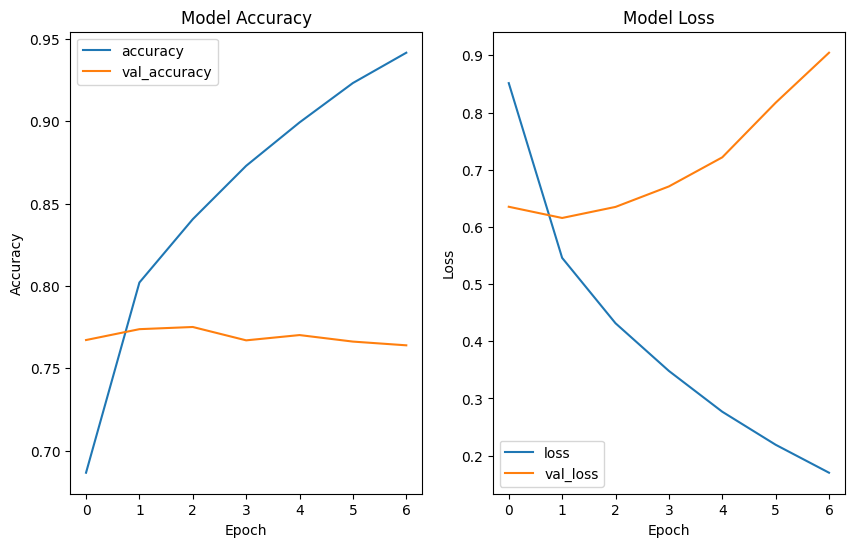

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

In [14]:
test = input()
test_vector = vectorizer.transform([test]).toarray()

prediction = model.predict(test_vector)
prediction = encoder.inverse_transform([prediction.argmax()])
print(f"Prediction: {prediction[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: Normal


In [15]:
model.save('../models/model.keras')